## Credit Risk Analytics 
#### Definition of Target and Outcome Window:
-One of the leading banks would like to predict bad customer (defaulters) while customer applying for loan. This model also called as PD Models (Probability of Default)

In [1]:
# Importing libraries for data manipulation and plotting

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

<Figure size 720x540 with 0 Axes>

In [2]:
# Importing libraries for stats modeling

import statsmodels.formula.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression


### Pre - Modeling (Data audit report) 

In [3]:
# Loading the data

data = pd.read_csv('E:/asubudhi/class/Class_5/bankloans.csv')
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
data.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [ ]:
# To get all the details about the data in a single command
# The details are saved in a html file named 'Credit_Risk_Data_Audit_Report.html'.

pandas_profiling.profileReport(data).to_file('Credit_Risk_Data_Audit_Report.html')

### Modeling
#### Data Preparation Step-1 (solving the issues found in data audit report)

In [6]:
# Converting the nominal categorical variable to numerical (optional as mainly done for odinal categorical variable)
dummy_var = pd.get_dummies(data[['ed']].astype("object"))
dummy_var.head()

,ed_1,ed_2,ed_3,ed_4,ed_5
0,0,0,1,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [7]:
# Dropping the original variable from which dummy variables are created

data.drop(['ed'],axis =1, inplace = True)

In [8]:
# Create a new dataframe by adding the dummy variable to the original dataframe

new_data = pd.concat([data,dummy_var], axis = 1)
new_data.head()

,age,employ,address,income,debtinc,creddebt,othdebt,default,ed_1,ed_2,ed_3,ed_4,ed_5
0,41,17,12,176,9.3,11.359392,5.008608,1.0,0,0,1,0,0
1,27,10,6,31,17.3,1.362202,4.000798,0.0,1,0,0,0,0
2,40,15,14,55,5.5,0.856075,2.168925,0.0,1,0,0,0,0
3,41,15,14,120,2.9,2.658720,0.821280,0.0,1,0,0,0,0
4,24,2,0,28,17.3,1.787436,3.056564,1.0,0,1,0,0,0


In [9]:
# Seperating the given data into train and test set.

data_train = new_data.iloc[0:700,:]
data_train.tail()

,age,employ,address,income,debtinc,creddebt,othdebt,default,ed_1,ed_2,ed_3,ed_4,ed_5
695,36,6,15,27,4.6,0.262062,0.979938,1.0,0,1,0,0,0
696,29,6,4,21,11.5,0.369495,2.045505,0.0,0,1,0,0,0
697,33,15,3,32,7.6,0.491264,1.940736,0.0,1,0,0,0,0
698,45,19,22,77,8.4,2.302608,4.165392,0.0,1,0,0,0,0
699,37,12,14,44,14.7,2.994684,3.473316,0.0,1,0,0,0,0


In [10]:
data_test = new_data.iloc[700:850,:]

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 700 to 849
Data columns (total 13 columns):
age         150 non-null int64
employ      150 non-null int64
address     150 non-null int64
income      150 non-null int64
debtinc     150 non-null float64
creddebt    150 non-null float64
othdebt     150 non-null float64
default     0 non-null float64
ed_1        150 non-null uint8
ed_2        150 non-null uint8
ed_3        150 non-null uint8
ed_4        150 non-null uint8
ed_5        150 non-null uint8
dtypes: float64(4), int64(4), uint8(5)
memory usage: 10.2 KB


- No missing value treatment required as no missing value found

In [12]:
# Outlier detection and its treatment

def outliers_treatment(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
data_train = data_train.apply(lambda x: outliers_treatment(x))

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


In [13]:
data_train.describe()

,age,employ,address,income,debtinc,creddebt,othdebt,default,ed_1,ed_2,ed_3,ed_4,ed_5
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0
mean,34.847243,8.358671,8.244386,44.848714,10.222153,1.498843,3.027290,0.261429,0.531429,0.282857,0.124286,0.054286,0.0
std,7.954735,6.566008,6.721915,31.942133,6.682160,1.788451,3.115401,0.439727,0.499368,0.450710,0.330143,0.226743,0.0
min,21.000000,0.000000,0.000000,15.000000,0.900000,0.030209,0.160936,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,29.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,34.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,40.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,53.010000,27.010000,26.010000,190.300000,30.701000,9.891428,17.184744,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [14]:
# For variable "ed_5", see the cofficient of variation is below 0.01. Thus, drop it from both train and test set. 
data_train.drop(['ed_5'],axis = 1, inplace = True)
data_test.drop(['ed_5'],axis = 1, inplace = True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Data Preparation Step - 2 (checking the assumption of the technique)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


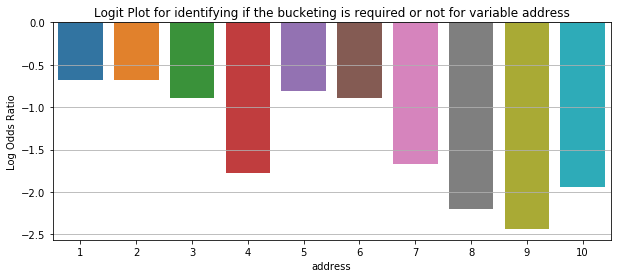

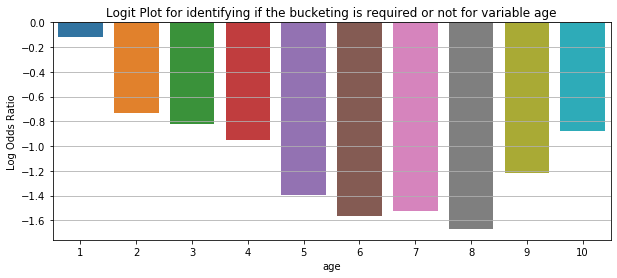

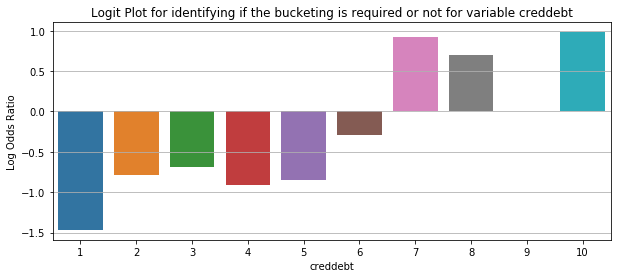

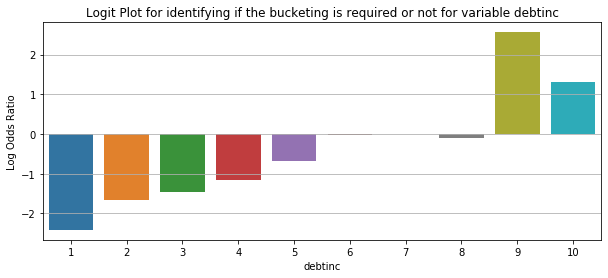

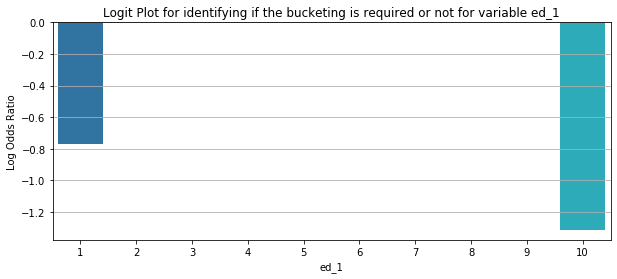

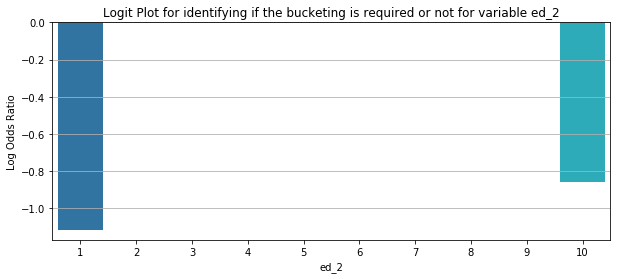

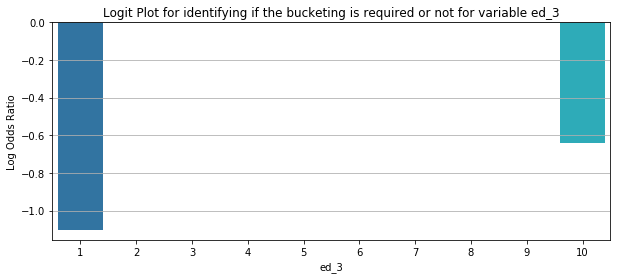

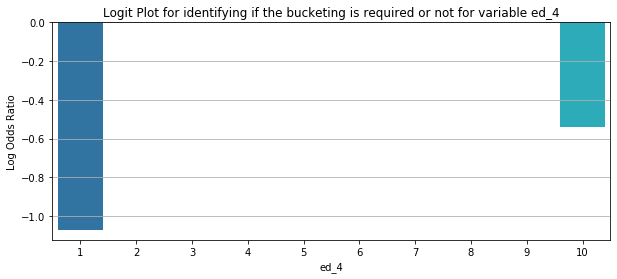

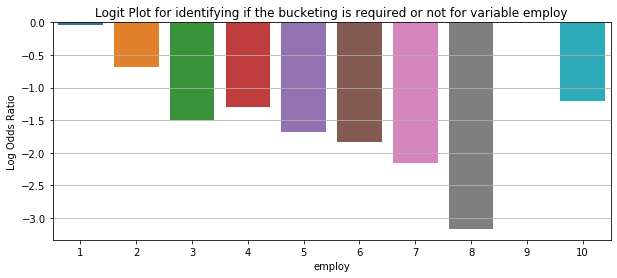

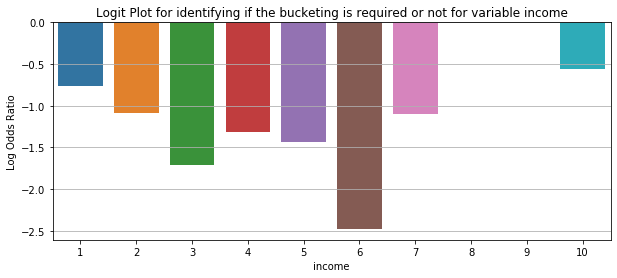

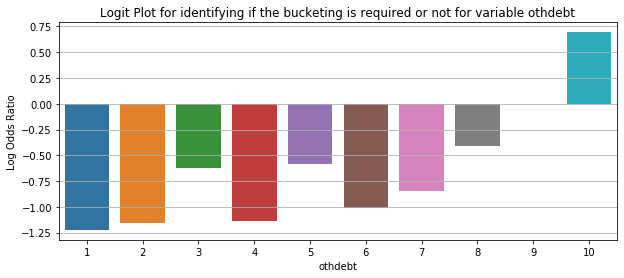

In [15]:
# checking the relationship of independent variable with dependent variable (Weigth of Evidence analysis)

bp = PdfPages('Transformation Plots.pdf')
st = pd.DataFrame()
for i in data_train.columns.difference(['default']):
    binned = pd.cut(data_train[i], bins=10, labels=list(range(1,11)))
    odds = data_train.groupby(binned)['default'].sum() / (data_train.groupby(binned)['default'].count()-data_train.groupby(binned)['default'].sum())
    log_odds = np.log(odds)
    st = pd.concat([st,log_odds],axis = 1)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(i))
    bp.savefig(fig)

bp.close()

- Important variables according to Weigth of Evidence (WOE) are : creddebt, debtinc, othdebt, employ, address, age, income

In [16]:
# Another way to see the relationship or importance of indepedent variable (Univariate regression)
somerc_d_df = pd.DataFrame()
for i in data_train.columns.difference(['default']):
    logit_model = smt.logit(formula = str('default ~') + str(i), data = data_train)
    logit_model = logit_model.fit()
    pred_prob = pd.DataFrame(logit_model.predict(data_train))
    somerc_d = 2*metrics.roc_auc_score(data_train['default'],pred_prob)-1
    temp = pd.DataFrame([i,somerc_d]).T
    temp.columns = ['features','Somerc_D']
    somerc_d_df = pd.concat([somerc_d_df,temp], axis = 0)
    

Optimization terminated successfully.
         Current function value: 0.559856
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.501389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567478
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573204
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572115
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572957
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527166
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569055
  

In [17]:
somerc_d_df.sort_values('Somerc_D', ascending = False)

,features,Somerc_D
0,debtinc,0.470506
0,employ,0.409138
0,creddebt,0.272378
0,address,0.222384
0,age,0.206329
0,income,0.200273
0,othdebt,0.173806
0,ed_1,0.135037
0,ed_3,0.053683
0,ed_2,0.0535456


- Important features according to univariate regression are: debtinc,employ,creddebt,address,age,income,othdebt 

In [18]:
# Selecting the variables which are important according to univariate regression and separating the dependent and independent variable.

features = data_train.iloc[:,[0,1,2,3,4,5,6]]
target = data_train.iloc[:,7]

In [19]:
# Check for Multicollinearity

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif['Features'] = features.columns

In [20]:
vif.sort_values(['VIF'], ascending = False)

,VIF,Features
0,15.599996,age
3,12.922961,income
4,10.028486,debtinc
6,7.715759,othdebt
1,5.200165,employ
5,4.173962,creddebt
2,3.574113,address


In [21]:
features.drop(['age'],axis = 1, inplace = True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif['Features'] = features.columns

In [23]:
vif.sort_values(['VIF'], ascending = False)

,VIF,Features
2,7.842601,income
5,5.691824,othdebt
0,4.699247,employ
3,3.956112,debtinc
4,3.498119,creddebt
1,2.781833,address


In [24]:
features.drop(['income'],axis = 1, inplace = True)

In [25]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif['Features'] = features.columns

In [26]:
vif.sort_values(['VIF'], ascending = False)

,VIF,Features
4,4.436528,othdebt
2,3.624147,debtinc
3,3.269440,creddebt
0,3.073768,employ
1,2.481654,address


- Data preparation step-3 is not required as the no of dependent variable available are minimum
#### Data Preparation Step-4 (Spliting the available data for validation)

In [27]:
# Creating formula for the model

formula = 'default~'+'+'.join(features.columns)

In [28]:
formula

'default~employ+address+debtinc+creddebt+othdebt'

In [29]:
final_data = pd.concat([features,target],axis = 1)

In [30]:
train,test = train_test_split(final_data, test_size = 0.3, random_state = 125)

#### Model creation

In [31]:
logistic_model = smt.logit(formula = 'default~employ+address+debtinc+creddebt+othdebt',data = train)
logistic_model = logistic_model.fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.404344
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      484
Method:                           MLE   Df Model:                            5
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3108
Time:                        11:25:20   Log-Likelihood:                -198.13
converged:                       True   LL-Null:                       -287.47
Covariance Type:            nonrobust   LLR p-value:                 1.020e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7266      0.316     -2.297      0.022      -1.347      -0.107
employ        -0.2430      0.

In [32]:
# Droping the variable having P-vale > 0.05 and again re- run the model.

train.drop(['othdebt'],axis =1, inplace = True)
test.drop(['othdebt'],axis =1, inplace = True)

In [33]:
logistic_model = smt.logit(formula = 'default~employ+address+debtinc+creddebt',data = train)
logistic_model = logistic_model.fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.404409
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      485
Method:                           MLE   Df Model:                            4
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3107
Time:                        11:25:21   Log-Likelihood:                -198.16
converged:                       True   LL-Null:                       -287.47
Covariance Type:            nonrobust   LLR p-value:                 1.472e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7044      0.303     -2.322      0.020      -1.299      -0.110
employ        -0.2461      0.

In [34]:
#Model equation : 
# LE = -0.2573*employ-0.1000*address+0.0933*debtinc+0.6960*creddebt-0.7043
# p(default = 1) = exp(LE)/1 + exp(LE)

In [35]:
# Calculating the accuracy metrics for train set based on predicted probability.

train['pred_prob'] = pd.DataFrame(logistic_model.predict(train))
train_gini = 2*metrics.roc_auc_score(train.default,train.pred_prob)-1

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
print("The Somerc_D score or Gini score for training set is",train_gini)

The Somerc_D score or Gini score for training set is 0.7174241153781653


In [37]:
# Calculating the accuracy metrics for test set based on predicted probability.

test['pred_prob'] = pd.DataFrame(logistic_model.predict(test))
test_gini = 2*metrics.roc_auc_score(test.default,test.pred_prob)-1

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
print("The Somerc_D score or Gini score for training set is",test_gini)

The Somerc_D score or Gini score for training set is 0.675751045759919


- The gini score for both train and test set are not varying more than 10%. So, lets proceed with the model

In [39]:
# Process to select best_cutoff

result_df = pd.DataFrame()
temp_train = train.copy()

for i in np.linspace(0,1,100):
    temp_train['cutoff'] = i
    temp_train['predicted'] = temp_train.pred_prob.apply(lambda x: 0.0 if x < i else 1.0)
    temp_train['tp'] = temp_train.apply(lambda x: 1.0 if x['default'] == 1.0 and x['predicted'] == 1.0 else 0.0, axis = 1)
    temp_train['fp'] = temp_train.apply(lambda x: 1.0 if x['default']==0.0 and x['predicted']==1 else 0.0, axis=1)
    temp_train['tn'] = temp_train.apply(lambda x: 1.0 if x['default']==0.0 and x['predicted']==0 else 0.0, axis=1)
    temp_train['fn'] = temp_train.apply(lambda x: 1.0 if x['default']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = temp_train['tp'].sum() / (temp_train['tp'].sum() + temp_train['fn'].sum())
    specificity = temp_train['tn'].sum() / (temp_train['tn'].sum() + temp_train['fp'].sum())
    accuracy = (temp_train['tp'].sum()  + temp_train['tn'].sum() ) / (temp_train['tp'].sum() + temp_train['fn'].sum() + temp_train['tn'].sum() + temp_train['fp'].sum())
    roc_like_table = pd.DataFrame([i, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    result_df = pd.concat([result_df, roc_like_table], axis=0)

In [40]:
result_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.273469
0,0.010101,1.000000,0.134831,0.371429
0,0.020202,0.992537,0.205056,0.420408
0,0.030303,0.992537,0.266854,0.465306
0,0.040404,0.992537,0.306180,0.493878


In [41]:
# The best cut_off is decided whose sum of specificity and sensitivity is highest/maximum.
result_df['total'] = result_df.specificity + result_df.sensitivity

In [42]:
best_cutoff = result_df[result_df['total'] == result_df['total'].max()].iloc[0,0]

In [43]:
print("The best_cutoff is",best_cutoff)

The best_cutoff is 0.25252525252525254


In [44]:
# Predicting class on train set based on best_cutoff

train['predicted'] = train.pred_prob.apply(lambda x: 0.0 if x < best_cutoff else 1.0)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
# Predicting class over test set based on best_cutoff

test['predicted'] = test.pred_prob.apply(lambda x: 0.0 if x < best_cutoff else 1.0)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# Creating confusion metrics for train set 
pd.crosstab(train.default, train.predicted)

predicted,0.0,1.0
default,,
0.0,262,94
1.0,21,113


In [47]:
# Metrics to see the accuracy of the model over train set

print(metrics.classification_report(train.default, train.predicted))

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82       356
         1.0       0.55      0.84      0.66       134

    accuracy                           0.77       490
   macro avg       0.74      0.79      0.74       490
weighted avg       0.82      0.77      0.78       490



In [48]:
# Creating confusion metrics for test set 

pd.crosstab(test.default, test.predicted)

predicted,0.0,1.0
default,,
0.0,116,45
1.0,12,37


In [49]:
# Metrics to see the accuracy of the model over train set

print(metrics.classification_report(test.default, test.predicted))

              precision    recall  f1-score   support

         0.0       0.91      0.72      0.80       161
         1.0       0.45      0.76      0.56        49

    accuracy                           0.73       210
   macro avg       0.68      0.74      0.68       210
weighted avg       0.80      0.73      0.75       210



#### Decile Analysis (to see the ranking i.e; the higher probability value has maximum no of 1's and vice versa)

In [50]:
# Decile analysis for train data

train['deciles'] = pd.qcut(train['pred_prob'],10, labels = False)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
no_1s = train[['deciles','default']].groupby(train.deciles).sum().sort_index(ascending=False)['default']
no_total = train[['deciles','default']].groupby(train.deciles).count().sort_index(ascending=False)['default']
max_prob = train[['deciles','pred_prob']].groupby(train.deciles).max().sort_index(ascending=False)['pred_prob']
min_prob = train[['deciles','pred_prob']].groupby(train.deciles).min().sort_index(ascending=False)['pred_prob']

In [52]:
Decile_analysis_train = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [53]:
Decile_analysis_train.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [54]:
Decile_analysis_train

,Min_prob,Max_prob,#1,#0,Total
deciles,,,,,
9,0.689580,0.986665,41.0,8.0,49
8,0.506054,0.688308,28.0,21.0,49
7,0.383079,0.504859,20.0,29.0,49
6,0.270119,0.379980,19.0,30.0,49
5,0.186633,0.269212,13.0,36.0,49
4,0.131931,0.186110,3.0,46.0,49
3,0.076624,0.131743,5.0,44.0,49
2,0.032157,0.076619,4.0,45.0,49
1,0.010241,0.032063,1.0,48.0,49


- The ranking seems perfect as the no of 1's column is descending linearly and no of 0's column is ascending linearly
- Maximum and minimum probability also shows linearly descending characteristic.

In [55]:
# Decile analysis for test data
 
test['deciles'] = pd.qcut(test['pred_prob'],10, labels = False)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
no_1s = test[['deciles','default']].groupby(test.deciles).sum().sort_index(ascending=False)['default']
no_total = test[['deciles','default']].groupby(test.deciles).count().sort_index(ascending=False)['default']
max_prob = test[['deciles','pred_prob']].groupby(test.deciles).max().sort_index(ascending=False)['pred_prob']
min_prob = test[['deciles','pred_prob']].groupby(test.deciles).min().sort_index(ascending=False)['pred_prob']

In [57]:
Decile_analysis_test = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [58]:
Decile_analysis_test.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [59]:
Decile_analysis_test

,Min_prob,Max_prob,#1,#0,Total
deciles,,,,,
9,0.618294,0.932910,16.0,5.0,21
8,0.460083,0.616959,10.0,11.0,21
7,0.329145,0.456618,8.0,13.0,21
6,0.234581,0.326380,4.0,17.0,21
5,0.180833,0.232175,5.0,16.0,21
4,0.122629,0.175502,3.0,18.0,21
3,0.074402,0.121601,1.0,20.0,21
2,0.041508,0.073869,1.0,20.0,21
1,0.017739,0.040462,1.0,20.0,21


- The ranking seems perfect as the no of 1's column is descending linearly and no of 0's column is ascending linearly
- Maximum and minimum probability also shows linearly descending characteristic.
- The test data result also has the similiar characteristic as train data result. Thus, the model seems fine. 

### Building Model with exisiting data and validating on new test data

In [60]:
# Creating the data for the new model

final_data1 = final_data.iloc[:,[0,1,2,3,5]]

In [61]:
# Model creation

new_logit_model = smt.logit(formula = 'default~employ+address+debtinc+creddebt', data = final_data1)
new_logit_model = new_logit_model.fit()
print(new_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.402616
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.2992
Time:                        11:27:22   Log-Likelihood:                -281.83
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 6.551e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8378      0.251     -3.341      0.001      -1.329      -0.346
employ        -0.2389      0.

In [62]:
# Predicting Probablities for the train set

final_data1['pred_prob'] = new_logit_model.predict(final_data1)

In [63]:
# Finding new best cutoff for new test data

cutoff_table = pd.DataFrame()

for i in np.linspace(0,1,100):
    final_data1['cutoff'] = i
    final_data1['pred'] = final_data1.pred_prob.apply(lambda x: 0.0 if x < i else 1.0)
    final_data1['tp'] = final_data1.apply(lambda x: 1.0 if x['default'] == 1 and x['pred'] == 1 else 0.0, axis = 1)
    final_data1['fp'] = final_data1.apply(lambda x: 1.0 if x['default'] == 0 and x['pred'] == 1 else 0.0, axis = 1)
    final_data1['tn'] = final_data1.apply(lambda x: 1.0 if x['default'] == 0 and x['pred'] == 0 else 0.0, axis = 1)
    final_data1['fn'] = final_data1.apply(lambda x: 1.0 if x['default'] == 1 and x['pred'] == 0 else 0.0, axis = 1)
    sensitivity = final_data1['tp'].sum()/(final_data1['tp'].sum() + final_data1['fn'].sum())
    specificity = final_data1['tn'].sum()/(final_data1['fp'].sum() + final_data1['tn'].sum())
    accuracy = (final_data1['tp'].sum() + final_data1['tn'].sum())/(final_data1['tp'].sum() + final_data1['fn'].sum() + final_data1['tn'].sum() + final_data1['fp'].sum())
    df = pd.DataFrame([i,sensitivity,specificity,accuracy]).T
    df.columns = ['cutoff','sensitivity','specificity','accuracy']
    cutoff_table = pd.concat([cutoff_table,df], axis = 0)

In [64]:
cutoff_table['total'] = cutoff_table.sensitivity + cutoff_table.specificity
cutoff_table.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.261429,1.000000
0,0.010101,1.000000,0.119923,0.350000,1.119923
0,0.020202,0.994536,0.189555,0.400000,1.184091
0,0.030303,0.994536,0.249516,0.444286,1.244052
0,0.040404,0.989071,0.295938,0.477143,1.285009


In [65]:
new_best_cutoff = cutoff_table[cutoff_table['total'] == cutoff_table['total'].max()].iloc[0,0]

In [66]:
print("The new best cutoff is",new_best_cutoff)

The new best cutoff is 0.19191919191919193


In [67]:
final_data1 = final_data1.iloc[:,0:6]
final_data1.head()

,employ,address,debtinc,creddebt,default,pred_prob
0,17.0,12.0,9.3,9.891428,1.0,0.749643
1,10.0,6.0,17.3,1.362202,0.0,0.200810
2,15.0,14.0,5.5,0.856075,0.0,0.010489
3,15.0,14.0,2.9,2.658720,0.0,0.025453
4,2.0,0.0,17.3,1.787436,1.0,0.782378


In [68]:
# Predicting the class over train set based on new cut off

final_data1['predicted'] = final_data1.pred_prob.apply(lambda x: 0.0 if x < new_best_cutoff else 1.0)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
# Creating confusion matrix for new train set

pd.crosstab(final_data1['default'], final_data1['predicted'])

predicted,0.0,1.0
default,,
0.0,342,175
1.0,20,163


In [70]:
# Metrics to see the accuracy of the model over train set

print(metrics.classification_report(final_data1.default,final_data1.predicted))

              precision    recall  f1-score   support

         0.0       0.94      0.66      0.78       517
         1.0       0.48      0.89      0.63       183

    accuracy                           0.72       700
   macro avg       0.71      0.78      0.70       700
weighted avg       0.82      0.72      0.74       700



#### Decile Analysis

In [71]:
# Decile Analysis for train data

final_data1['deciles'] = pd.qcut(final_data1.pred_prob,10,labels = False)
no_1s = final_data1[['deciles','default']].groupby(final_data1.deciles).sum().sort_index(ascending=False)['default']
no_total = final_data1[['deciles','default']].groupby(final_data1.deciles).count().sort_index(ascending=False)['default']
max_prob = final_data1[['deciles','pred_prob']].groupby(final_data1.deciles).max().sort_index(ascending=False)['pred_prob']
min_prob = final_data1[['deciles','pred_prob']].groupby(final_data1.deciles).min().sort_index(ascending=False)['pred_prob']
Decile_analysis_train = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)
Decile_analysis_train.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']
Decile_analysis_train

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Min_prob,Max_prob,#1,#0,Total
deciles,,,,,
9,0.666941,0.985046,56.0,14.0,70
8,0.466646,0.661336,39.0,31.0,70
7,0.355806,0.464473,28.0,42.0,70
6,0.249115,0.355476,22.0,48.0,70
5,0.182689,0.247082,19.0,51.0,70
4,0.121560,0.180098,6.0,64.0,70
3,0.070690,0.121171,6.0,64.0,70
2,0.035120,0.070416,5.0,65.0,70
1,0.010987,0.034952,2.0,68.0,70


In [72]:
data_test1 = data_test.iloc[:,[1,2,4,5,7]]

In [73]:
# Predicting probabilites for new test data

data_test1['pred_prob'] = new_logit_model.predict(data_test1)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
data_test1.head()

,employ,address,debtinc,creddebt,default,pred_prob
700,16,13,10.9,0.544128,NaN,0.011687
701,6,27,12.9,1.316574,NaN,0.074136
702,9,9,17.0,4.880700,NaN,0.686604
703,5,7,2.0,0.046000,NaN,0.083370
704,4,0,7.8,0.866736,NaN,0.357670


In [75]:
# predicting class for test set

data_test1['default'] = data_test1.pred_prob.apply(lambda x: 0.0 if x < new_best_cutoff else 1.0)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
data_test1.head()

,employ,address,debtinc,creddebt,default,pred_prob
700,16,13,10.9,0.544128,0.0,0.011687
701,6,27,12.9,1.316574,0.0,0.074136
702,9,9,17.0,4.880700,1.0,0.686604
703,5,7,2.0,0.046000,0.0,0.083370
704,4,0,7.8,0.866736,1.0,0.357670


In [77]:
# Decile analysis for test set

data_test1['deciles'] = pd.qcut(data_test1.pred_prob,10,labels = False)
no_1s = data_test1[['deciles','default']].groupby(data_test1.deciles).sum().sort_index(ascending=False)['default']
no_total = data_test1[['deciles','default']].groupby(data_test1.deciles).count().sort_index(ascending=False)['default']
max_prob = data_test1[['deciles','pred_prob']].groupby(data_test1.deciles).max().sort_index(ascending=False)['pred_prob']
min_prob = data_test1[['deciles','pred_prob']].groupby(data_test1.deciles).min().sort_index(ascending=False)['pred_prob']
Decile_analysis_test = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)
Decile_analysis_test.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']
Decile_analysis_test

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Min_prob,Max_prob,#1,#0,Total
deciles,,,,,
9,0.686604,0.997118,15.0,0.0,15
8,0.426397,0.684904,15.0,0.0,15
7,0.327436,0.419134,15.0,0.0,15
6,0.241705,0.326342,15.0,0.0,15
5,0.157956,0.227533,6.0,9.0,15
4,0.083370,0.138790,0.0,15.0,15
3,0.044914,0.081188,0.0,15.0,15
2,0.021447,0.044880,0.0,15.0,15
1,0.006991,0.021075,0.0,15.0,15


- Higher probability decile have maximum no of 1's and low probability decile have maximum no of 0's. As expected from good classification model.

In [78]:
data_test1.default.value_counts()

0.0    84
1.0    66
Name: default, dtype: int64

In [ ]:
# We are rejecting applications for 66 customers based on cut-off = 0.19